In [113]:
import sys

sys.path.append('../')

from fuzzy_system import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Some Fuzzy Variables


In [114]:
xcrispset = CrispSet({("x", make_continuousSet((0, 4.25)))})
x = LinguisticVariable(xcrispset)

x.add_linguistic_term(Sigmoid("smaller3", 3, -5))
x.add_linguistic_term(Sigmoid("greater3", 3, 5))

x.add_linguistic_term(Sigmoid("smaller2", 2, -5))
x.add_linguistic_term(Sigmoid("greater2", 2, 5))

x.add_linguistic_term(Sigmoid("smaller1", 1, -5))
x.add_linguistic_term(Sigmoid("greater1", 1, 5))

In [115]:
ycrispset = CrispSet({("y", make_continuousSet((0, 3.25)))})
y = LinguisticVariable(ycrispset)

y.add_linguistic_term(Sigmoid("smaller2", 2, -5))
y.add_linguistic_term(Sigmoid("greater2", 2, 5))

y.add_linguistic_term(Sigmoid("smaller1", 1, -5))
y.add_linguistic_term(Sigmoid("greater1", 1, 5))

In [116]:
resultcrispset = CrispSet({("Class", make_continuousSet((0, 4)))})
cls = LinguisticVariable(resultcrispset)

cls.add_linguistic_term(Gaussian("1", 1, 0.25))
cls.add_linguistic_term(Gaussian("2", 2, 0.25))
cls.add_linguistic_term(Gaussian("3", 3, 0.25))

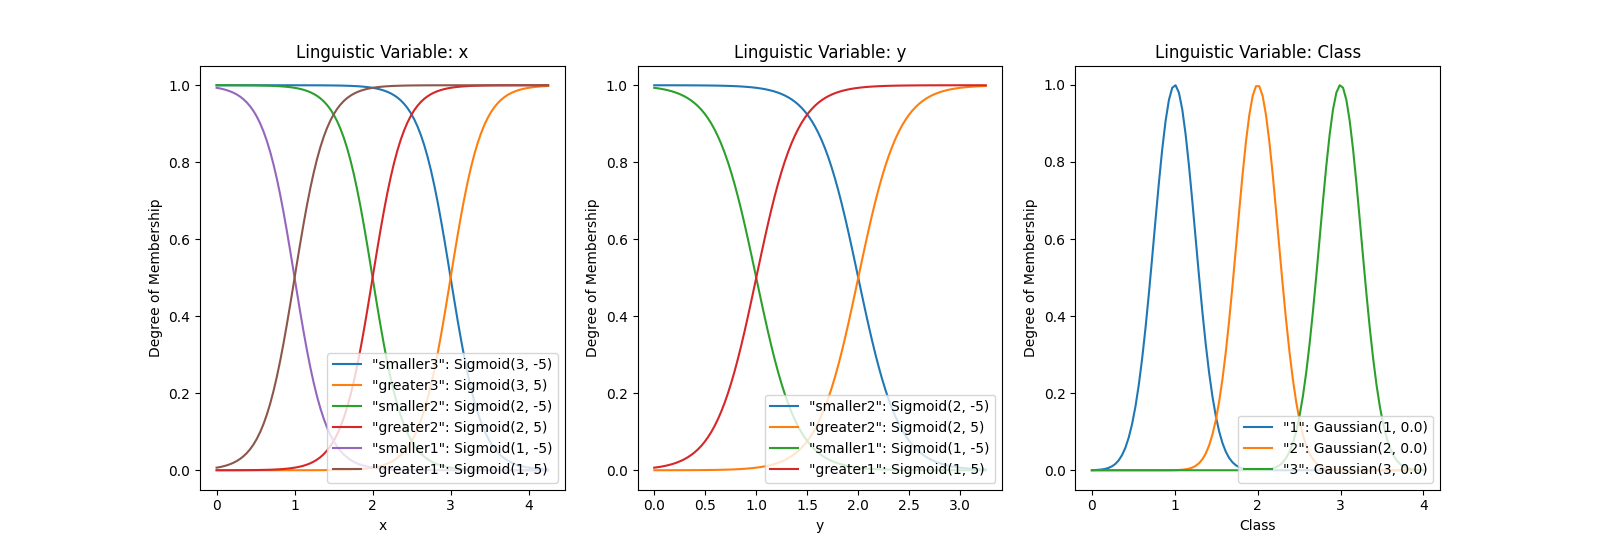

In [117]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 5.5)

x.plot(ax[0])
y.plot(ax[1])
cls.plot(ax[2])

plt.show()


# set fontsize to 14
for i, ax in enumerate(ax):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

        # legend size
        ax.legend(prop={'size': 15}, loc="lower right")

        # make lines bold
        for line in ax.get_lines():
            line.set_linewidth(3)

    if i == 0:
        ax.vlines(3, 0, 1, color="black", linestyle="--", zorder=-1)
        ax.vlines(2, 0, 1, color="black", linestyle="--", zorder=-1)
        ax.vlines(1, 0, 1, color="black", linestyle="--", zorder=-1)
    elif i == 1:
        ax.vlines(2, 0, 1, color="black", linestyle="--", zorder=-1)
        ax.vlines(1, 0, 1, color="black", linestyle="--", zorder=-1)
        # delete y label
        ax.set_ylabel("")
    elif i == 2:
        ax.vlines(1, 0, 1, color="black", linestyle="--", zorder=-1)
        ax.vlines(2, 0, 1, color="black", linestyle="--", zorder=-1)
        ax.vlines(3, 0, 1, color="black", linestyle="--", zorder=-1)
        # delete y label
        ax.set_ylabel("")


fig.tight_layout()

fig.savefig("fuzzy_sets.png", dpi=300)

# Plot Rule Input


In [118]:
rule1 = FuzzyRule(((x == "smaller3") & (y == "smaller2"))
                  & (x == "smaller2"), cls == "1")
rule2 = FuzzyRule(((x == "smaller3") & (y == "smaller2"))
                  & (x == "greater2"), cls == "2")

rule3 = FuzzyRule(((x == "smaller3") & (y == "greater2"))
                  & (x == "smaller1"), cls == "2")
rule4 = FuzzyRule(((x == "smaller3") & (y == "greater2"))
                  & (x == "greater1"), cls == "1")

rule5 = FuzzyRule(((x == "greater3") & (y == "smaller1")),
                  cls == "1")
rule6 = FuzzyRule(((x == "greater3") & (y == "greater1")),
                  cls == "3")

# Resulting System


In [119]:
fs = FuzzySystem()

fs.add_rule(rule1)
fs.add_rule(rule2)
fs.add_rule(rule3)
fs.add_rule(rule4)
fs.add_rule(rule5)
fs.add_rule(rule6)

fs

FuzzySystem: Class
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "smaller2": Sigmoid(2, -5))" and "smaller2": Sigmoid(2, -5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "smaller2": Sigmoid(2, -5))" and "greater2": Sigmoid(2, 5))"
  THEN	 "2": Gaussian(2, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "greater2": Sigmoid(2, 5))" and "smaller1": Sigmoid(1, -5))"
  THEN	 "2": Gaussian(2, 0.0)
)
FuzzyRule(
  IF	 "("("smaller3": Sigmoid(3, -5) and "greater2": Sigmoid(2, 5))" and "greater1": Sigmoid(1, 5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("greater3": Sigmoid(3, 5) and "smaller1": Sigmoid(1, -5))"
  THEN	 "1": Gaussian(1, 0.0)
)
FuzzyRule(
  IF	 "("greater3": Sigmoid(3, 5) and "greater1": Sigmoid(1, 5))"
  THEN	 "3": Gaussian(3, 0.0)
)

# Plot Fitnes at a specific point


/tmp/ipykernel_355279/1159387829.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


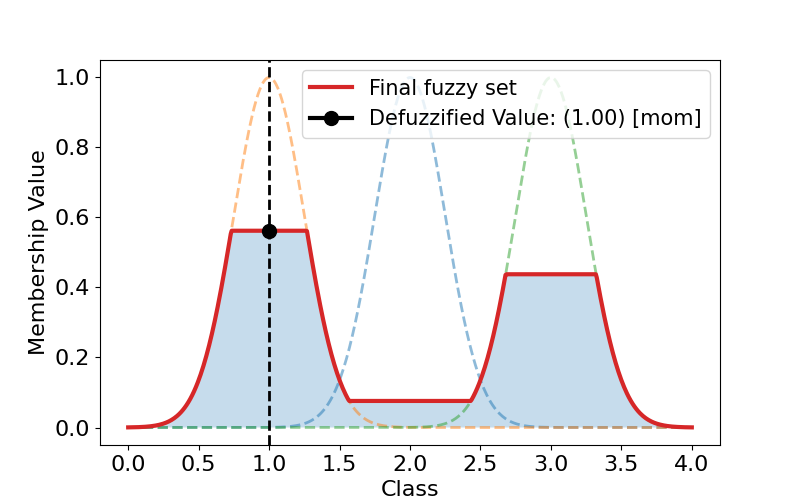

In [120]:
data = {"x": 2.95, "y": 2.5}

rules = fs.applyRules(data)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)

rules.plot(ax, n=600)


# set fontsize to 14
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

    # if line is dashed

    # legend size
    ax.legend(prop={'size': 15}, loc="lower right")

    # make lines bold
    for line in ax.get_lines():
        line.set_linewidth(3)
        # if line is dashed
        if line.get_linestyle() == "--":
            line.set_linewidth(2)


fig.tight_layout()

# crate new legend
newtext1=""
newtext2=""

handles, labels = ax.get_legend_handles_labels()
for i in range(len(labels)):
    if i == 0:
       newtext1 = "Final fuzzy set"
    if i == 1:
        newtext2 = labels[i]

ax.legend([handles[0], handles[1]], [newtext1, newtext2], prop={'size': 15}, loc="upper right")


fig.savefig("fuzzy_set_for_data_mom.png", dpi=300)

/tmp/ipykernel_355279/3730008044.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


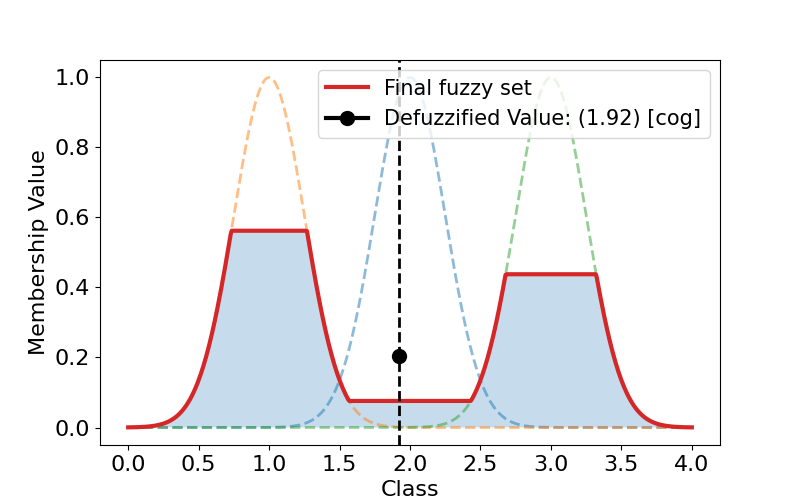

In [121]:
data = {"x": 2.95, "y": 2.5}

rules = fs.applyRules(data)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)

rules.plot(ax, n=600, defuzzifiationMethod="cog")


# set fontsize to 14
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

    # if line is dashed

    # legend size
    ax.legend(prop={'size': 15}, loc="lower right")

    # make lines bold
    for line in ax.get_lines():
        line.set_linewidth(3)
        # if line is dashed
        if line.get_linestyle() == "--":
            line.set_linewidth(2)


fig.tight_layout()

# crate new legend
newtext1=""
newtext2=""

handles, labels = ax.get_legend_handles_labels()
for i in range(len(labels)):
    if i == 0:
       newtext1 = "Final fuzzy set"
    if i == 1:
        newtext2 = labels[i]

ax.legend([handles[0], handles[1]], [newtext1, newtext2], prop={'size': 15}, loc="upper right")


fig.savefig("fuzzy_set_for_data_cog.png", dpi=300)

# Plot Decision Surface


In [122]:
def plot(X, Y, Z):
    fig, axs = plt.subplots(1)
    axs.set_xlabel("x")
    axs.set_ylabel("y")

    # xlabes only integers
    axs.set_xticks(np.arange(0, 5.5, 0.5))
    axs.set_yticks(np.arange(0, 4.5, 0.5))

    # label positions at end of axis
    axs.xaxis.set_label_coords(0.95, -0.1)
    axs.yaxis.set_label_coords(-0.1, 0.95)

    # y label rotated
    axs.yaxis.label.set_rotation(0)

    my_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "", ["blue", "red", "green"])

    countour = axs.contourf(X, Y, Z, levels=100,
                            cmap=my_cmap, extend='both')

    CS = axs.contour(X, Y, Z, levels=[1.5, 2.5],
                     linestyles='dashed', colors='black')
    axs.clabel(CS, inline=True, fontsize=12, colors='black')

    cbar = fig.colorbar(countour, ax=axs)
    cbar.set_label("Class")
    cbar.set_ticks([1, 2, 3])

    return fig

In [123]:
X = np.linspace(0, 4, 50)
Y = np.linspace(0, 3, 50)

In [124]:
Z_mom = np.array(
    [[fs.predict({"x": x, "y": y}, method="mom") for x in X] for y in Y])

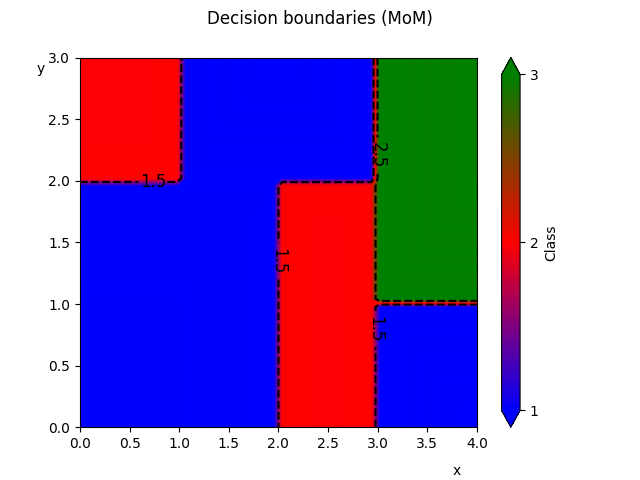

In [125]:
fig_mom = plot(X, Y, Z_mom)

fig_mom.suptitle("Decision boundaries (MoM)")

fig_mom.savefig("fuzzy_system_mom.png", dpi=300)

In [126]:
Z_cog = np.array(
    [[fs.predict({"x": x, "y": y}, method="cog") for x in X] for y in Y])

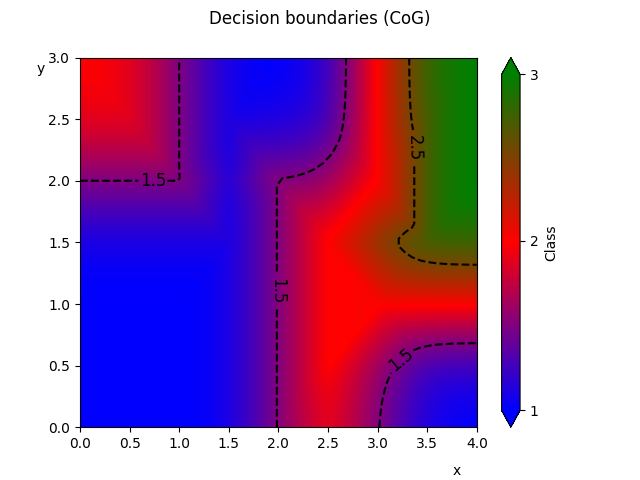

In [127]:
fig_cog = plot(X, Y, Z_cog);

fig_cog.suptitle("Decision boundaries (CoG)")

fig_cog.savefig("fuzzy_system_cog.png", dpi=300)